In [60]:
#IMPORT LIBRARY
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#load the data
df = pd.read_csv('Titanic.csv.csv')
print(df)

     PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...

In [61]:
#missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


<Axes: xlabel='Survived', ylabel='count'>

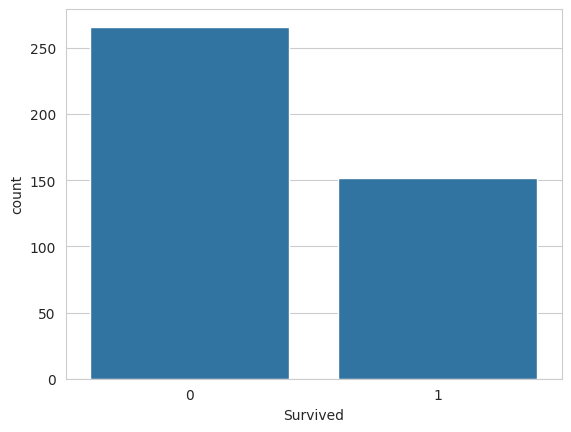

In [62]:

import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(x="Survived",data=df)


<Axes: xlabel='Survived', ylabel='count'>

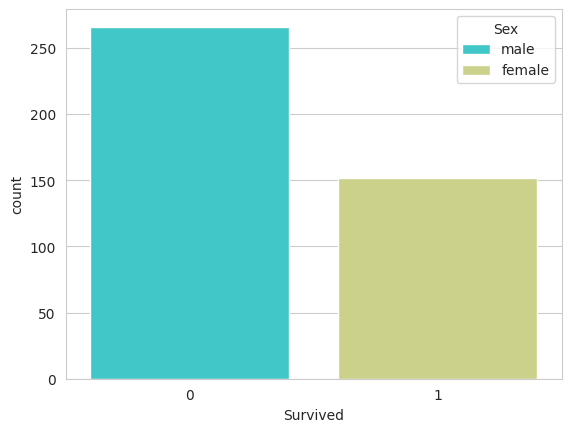

In [63]:


sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df, palette='rainbow')

<Axes: xlabel='Survived', ylabel='count'>

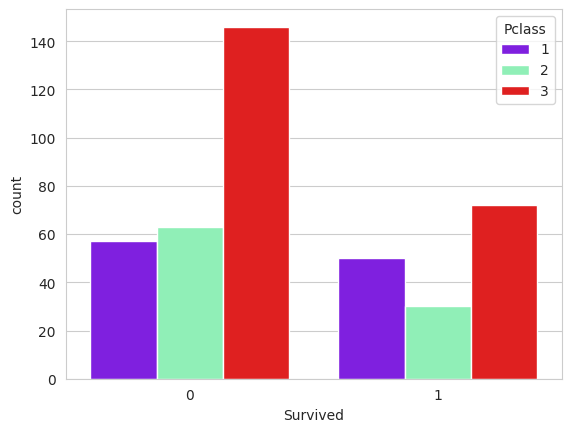

In [64]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df, palette='rainbow')


In [65]:
#Treating the missing values
df['Age'].fillna(df['Age'].mean(), inplace=True)
sex_replacements = {'Sex': {'male': 0, 'female': 1}}
embarked_replacements = {'Embarked': {'Q': 0, 'S': 1, 'C': 2}}
#replace
df.replace(sex_replacements, inplace=True)
df.replace(embarked_replacements, inplace=True)

In [66]:
df=df.drop('Cabin',axis=1)
print(df)

     PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name  Sex       Age  SibSp  \
0                                Kelly, Mr. James    0  34.50000      0   
1                Wilkes, Mrs. James (Ellen Needs)    1  47.00000      1   
2                       Myles, Mr. Thomas Francis    0  62.00000      0   
3                                Wirz, Mr. Albert    0  27.00000      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)    1  22.00000      1   
..                                            ...  ...       ...    ...   
413               

In [67]:
#DROPPING
X = df.drop('PassengerId', axis=1)
X = X.drop('Name', axis=1)
X = X.drop('Ticket', axis=1)

X = X.drop('Survived', axis=1)

X = X.drop('Fare', axis=1)
Y = df['Survived']
print(Y)
print(X)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64
     Pclass  Sex       Age  SibSp  Parch  Embarked
0         3    0  34.50000      0      0         0
1         3    1  47.00000      1      0         1
2         2    0  62.00000      0      0         0
3         3    0  27.00000      0      0         1
4         3    1  22.00000      1      1         1
..      ...  ...       ...    ...    ...       ...
413       3    0  30.27259      0      0         1
414       1    1  39.00000      0      0         2
415       3    0  38.50000      0      0         1
416       3    0  30.27259      0      0         1
417       3    0  30.27259      1      1         2

[418 rows x 6 columns]


In [68]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64


In [73]:
#RANDOMFOREST
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

rf=RandomForestClassifier()
# Splitting the dataset into the Training set and Test set
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=0.3)

train=rf.fit(X_train,Y_train)

Y_pred=rf.predict(X_test)

print(accuracy_score(Y_test,Y_pred)*100)
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

70.63492063492063
              precision    recall  f1-score   support

           0       0.70      0.83      0.76        71
           1       0.71      0.55      0.62        55

    accuracy                           0.71       126
   macro avg       0.71      0.69      0.69       126
weighted avg       0.71      0.71      0.70       126

[[59 12]
 [25 30]]


In [74]:
#DECISIONTREE
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

dt=tree.DecisionTreeClassifier()
# Splitting the dataset into the Training set and Test set
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=0.3)

train=dt.fit(X_train,Y_train)

Y_pred=dt.predict(X_test)

print(accuracy_score(Y_test,Y_pred)*100)
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

77.77777777777779
              precision    recall  f1-score   support

           0       0.78      0.85      0.81        71
           1       0.78      0.69      0.73        55

    accuracy                           0.78       126
   macro avg       0.78      0.77      0.77       126
weighted avg       0.78      0.78      0.78       126

[[60 11]
 [17 38]]


In [75]:
#LOGISTICREGRESSION
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

logr=LogisticRegression()
pca=PCA(n_components=2)


pca.fit(X)
X=pca.transform(X)

#print(X)
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=0,test_size=0.3)

logr.fit(X_train,Y_train)

Y_pred=logr.predict(X_test)
print(accuracy_score(Y_test,Y_pred)*100)
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

54.761904761904766
              precision    recall  f1-score   support

           0       0.56      0.92      0.70        71
           1       0.40      0.07      0.12        55

    accuracy                           0.55       126
   macro avg       0.48      0.49      0.41       126
weighted avg       0.49      0.55      0.45       126

[[65  6]
 [51  4]]


In [76]:
#KNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

knn=KNeighborsClassifier(n_neighbors=5)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0)

train=knn.fit(X_train,Y_train)

Y_pred=knn.predict(X_test)

print(accuracy_score(Y_test,Y_pred)*100)
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

54.285714285714285
              precision    recall  f1-score   support

           0       0.57      0.67      0.62        58
           1       0.49      0.38      0.43        47

    accuracy                           0.54       105
   macro avg       0.53      0.53      0.52       105
weighted avg       0.53      0.54      0.53       105

[[39 19]
 [29 18]]
